In [53]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
cd = pd.read_csv(city_data_to_load)
rd = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
data = rd.join(cd.set_index('city'), on = 'city')
# Display the data table for preview
cd.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


## Bubble Plot of Ride Sharing Data

Text(42,35,'Note: \n Circle size correlates with driver count per city')

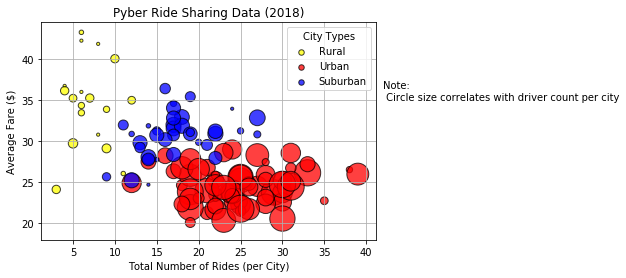

In [13]:
# Obtain the x and y coordinates for each of the three city types
rural = data.loc[data['type'] == 'Rural', :].groupby('city')
urban = data.loc[data['type'] == 'Urban', :].groupby('city')
suburban = data.loc[data['type'] == 'Suburban', :].groupby('city')

ruralx = rural['ride_id'].count()
urbanx = urban['ride_id'].count()
suburbanx = suburban['ride_id'].count()


ruraly = rural['fare'].mean()
urbany = urban['fare'].mean()
suburbany = suburban['fare'].mean()

ruralsize = rural['driver_count'].max()*10
urbansize = urban['driver_count'].max()*10
suburbansize = suburban['driver_count'].max()*10


# Build the scatter plots for each city types

rur = plt.scatter(ruralx, ruraly, marker="o", facecolors="yellow", label = 'Rural', edgecolors="black",
            s=ruralsize, alpha=0.75)
urb = plt.scatter(urbanx, urbany, marker="o", facecolors="red", label = 'Urban', edgecolors="black",
            s=urbansize, alpha=0.75)
sub = plt.scatter(suburbanx, suburbany, marker="o", facecolors="blue", label = 'Suburban', edgecolors="black",
            s=suburbansize, alpha=0.75)
# Incorporate the other graph properties
plt.grid()
plt.title('Pyber Ride Sharing Data (2018)')
plt.xlabel('Total Number of Rides (per City)')
plt.ylabel('Average Fare ($)')
# Create a legend
lgnd = plt.legend(handles=[rur, urb, sub], loc="best", title = 'City Types')
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
plt.text(x = 42, y = 35, s = 'Note: \n Circle size correlates with driver count per city')
# Save Figure


In [14]:
# Show plot
plt.show()

## Total Fares by City Type

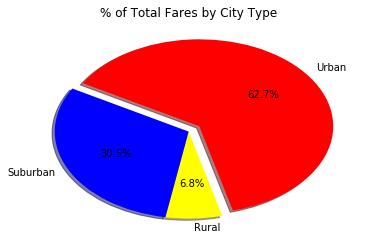

In [47]:
# Calculate Type Percents
totFare = rd['fare'].sum()

rurFare = data.loc[data['type'] == 'Rural', ['fare']].sum()
urbFare = data.loc[data['type'] == 'Urban', ['fare']].sum()
subFare = data.loc[data['type'] == 'Suburban', ['fare']].sum()

rurPf = rurFare/totFare
urbPf = urbFare/totFare
subPf = subFare/totFare

# Build Pie Chart
labels = ['Rural','Urban','Suburban']
sizes = [rurPf,urbPf,subPf]
colors = ['yellow',"red",'blue']
explode = (0,.1,0)

plt.title('% of Total Fares by City Type')
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=260)
# Save Figure
plt.savefig('TotalFaresByCityType')

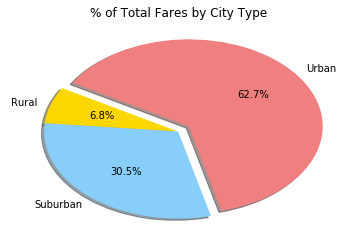

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

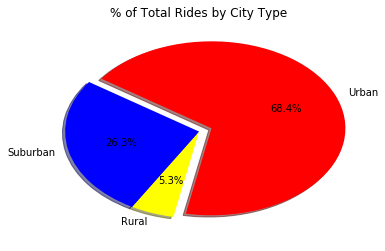

In [52]:
# Calculate Ride Percents
totRides = rd['ride_id'].count()

rurRides = data.loc[data['type'] == 'Rural', ['ride_id']].count()
urbRides = data.loc[data['type'] == 'Urban', ['ride_id']].count()
subRides = data.loc[data['type'] == 'Suburban', ['ride_id']].count()

rurPr = rurRides/totRides
urbPr = urbRides/totRides
subPr = subRides/totRides

# Build Pie Chart
labels = ['Rural','Urban','Suburban']
sizes = [rurPr,urbPr,subPr]
colors = ['yellow',"red",'blue']
explode = (0,.1,0)

plt.title('% of Total Rides by City Type')
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=240)
# Save Figure
plt.savefig('TotalRidesByCityType')

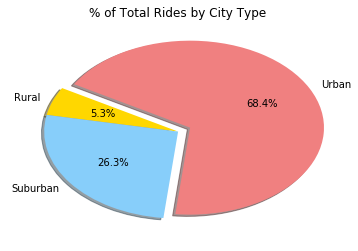

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

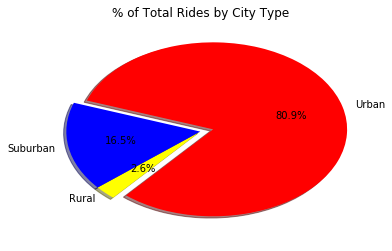

In [63]:
# Calculate Ride Percents
totDrivers = cd['driver_count'].sum()

rurDrivers = cd.loc[cd['type'] == 'Rural', ['driver_count']].sum()
urbDrivers = cd.loc[cd['type'] == 'Urban', ['driver_count']].sum()
subDrivers = cd.loc[cd['type'] == 'Suburban', ['driver_count']].sum()

rurPd = rurDrivers/totDrivers
urbPd = urbDrivers/totDrivers
subPd = subDrivers/totDrivers

# Build Pie Chart
labels = ['Rural','Urban','Suburban']
sizes = [rurPd,urbPd,subPd]
colors = ['yellow',"red",'blue']
explode = (0,.1,0)

plt.title('% of Total Rides by City Type')
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=220)
# Save Figure
plt.savefig('TotalDriversByCityType')

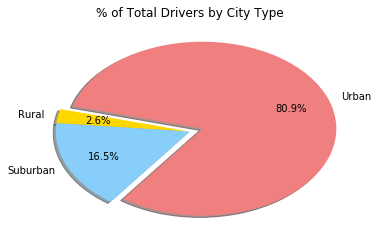

In [6]:
# Show Figure
plt.show()